In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

### Data Reading & Data Types 

In [2]:
#Read the data in pandas
inp0= pd.read_csv("Attribute+DataSet.csv")
inp1= pd.read_csv("Dress+Sales.csv")

In [3]:
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [4]:
inp0.Price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 479 entries, 0 to 478
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
477 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


In [5]:
inp0.Price.dtype

dtype('O')

Q.__You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


<h4 style = "color : Green"> where the categories are only labeled without any order of precedence are called nominal features. </h4>

<h4 style = "color : Green"> Features which have some order associated with them are called ordinal features. For example, a feature like economic status, with three categories: low, medium and high, which have an order associated with them. </h4>

<h4 style = "color : Green">There are also continuous features. These are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or a date/time. </h4>

In [6]:
# Studying  “Recommendation” in  “Attribute DataSet” 
inp0.Recommendation.info()

<class 'pandas.core.series.Series'>
RangeIndex: 479 entries, 0 to 478
Series name: Recommendation
Non-Null Count  Dtype
--------------  -----
479 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


In [7]:
inp0.Recommendation.dtype

dtype('int64')

In [8]:
inp0.Recommendation.value_counts()

0    274
1    205
Name: Recommendation, dtype: int64

Q.__There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


<h3 style = "color : Green">Ans= Integer type and categorical. </h3>

Q.__Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


<h3 style = "color : Green">Ans=  None of the above </h3>

# Print the information about the attributes of inp0 and inp1.


In [9]:
inp0.Size.value_counts()

M        171
free     165
L         93
S         34
XL        14
small      1
s          1
Name: Size, dtype: int64

In [10]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.

inp0['Size'].replace(['XL','L','M','S','s','small','free'], ['Extra Large','Large','Medium','Small','Small','Small','Free'], inplace=True)

In [11]:
inp0['Size'].value_counts()

Medium         171
Free           165
Large           93
Small           36
Extra Large     14
Name: Size, dtype: int64

In [12]:
# Print the value counts of each category in "Size" column.

inp0.Size.value_counts(normalize=True)

Medium         0.356994
Free           0.344468
Large          0.194154
Small          0.075157
Extra Large    0.029228
Name: Size, dtype: float64

### Fixing the Rows and Columns 

Q.__As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


<h3 style = "color : Green">Ans=  2.9%, 35.7%, 7.5%  ____________            Use the percent formula to convert above numbers with total values(479)</h3>

### Impute/Remove Missing values

In [13]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [14]:
inp1.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [15]:
# Print the null count of each variables of inp0 and inp1.
inp1.isnull().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      0
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

In [16]:
inp1['09-12-2013'] = pd.to_numeric(inp1['09-12-2013'])

ValueError: Unable to parse string "Removed" at position 263

<h4>Above is the error found when tried to convert object type to numeric datatype, now lets try to fix this and removing the string values with Null values and then trying to convert full column to Numeric type</h4>

In [17]:
inp1.loc[inp1['09-12-2013']== 'Removed',"09-12-2013"] = np.NaN
inp1.loc[inp1['14-09-2013']== 'removed',"14-09-2013"] = np.NaN
inp1.loc[inp1['16-09-2013']== 'removed',"16-09-2013"] = np.NaN
inp1.loc[inp1['18-09-2013']== 'removed',"18-09-2013"] = np.NaN
inp1.loc[inp1['20-09-2013']== 'removed',"20-09-2013"] = np.NaN
inp1.loc[inp1['22-09-2013']== 'Orders',"22-09-2013"] = np.NaN

In [18]:
# Convert the object type columns in "Dress Sales" into float type of data type.
inp1['09-12-2013'] = pd.to_numeric(inp1['09-12-2013'], downcast='float')
inp1['14-09-2013'] = pd.to_numeric(inp1['14-09-2013'], downcast='float')
inp1['16-09-2013'] = pd.to_numeric(inp1['16-09-2013'], downcast='float')
inp1['18-09-2013'] = pd.to_numeric(inp1['18-09-2013'], downcast='float')
inp1['20-09-2013'] = pd.to_numeric(inp1['20-09-2013'], downcast='float')
inp1['22-09-2013'] = pd.to_numeric(inp1['22-09-2013'], downcast='float')

In [19]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float32
 9   14-09-2013  478 non-null    float32
 10  16-09-2013  478 non-null    float32
 11  18-09-2013  478 non-null    float32
 12  20-09-2013  478 non-null    float32
 13  22-09-2013  478 non-null    float32
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

Q.__You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







<h4 style = "color : Green">Error occurred because there are string entries in such columns. You should replace these string values with null values and then convert it into float type. </h4>

In [20]:
# Print the null percetange of each column of inp1.
inp1.isnull().sum()/len(inp1.index)*100

Dress_ID       0.000000
29-08-2013     0.000000
31-08-2013     0.000000
09-02-2013     0.000000
09-04-2013     0.000000
09-06-2013     0.000000
09-08-2013     0.000000
09-10-2013     0.000000
09-12-2013     0.208768
14-09-2013     0.208768
16-09-2013     0.208768
18-09-2013     0.208768
20-09-2013     0.208768
22-09-2013     0.208768
24-09-2013     0.000000
26-09-2013    46.346555
28-09-2013     0.000000
30-09-2013    53.653445
10-02-2013    54.070981
10-04-2013    53.862213
10-06-2013     0.000000
10-08-2013    53.235908
10-10-2013    53.235908
10-12-2013     0.000000
dtype: float64

In [21]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
inp1 = inp1.drop(['26-09-2013','30-09-2013','10-02-2013','10-04-2013','10-08-2013','10-10-2013'], axis=1)

inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float32
 9   14-09-2013  478 non-null    float32
 10  16-09-2013  478 non-null    float32
 11  18-09-2013  478 non-null    float32
 12  20-09-2013  478 non-null    float32
 13  22-09-2013  478 non-null    float32
 14  24-09-2013  479 non-null    int64  
 15  28-09-2013  479 non-null    int64  
 16  10-06-2013  479 non-null    int64  
 17  10-12-2013  479 non-null    int64  
dtypes: float32(6), float64(1), int64(11)
memory usage: 56.3 KB


When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

<h3 style = "color : Green">These columns can be removed because they have a huge number of missing values. Moreover, if you see, the number of sales (numerical values) in such columns is not so high as compared to other Date columns. Hence, it is safe to remove such columns. </h3>

In [22]:
inp1.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,16-09-2013,18-09-2013,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,3277.0,3321.0,3386.0,3479.0,3554,3706,3897,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,1878.0,1985.0,2106.0,2454.0,2710,3258,3911,4277
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,10.0,10.0,10.0,11.0,11,11,11,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,1783.0,1796.0,1812.0,1845.0,1878,1914,1952,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,1681.0,1743.0,1824.0,1919.0,2032,2252,2544,2736


In [23]:
# Create the four seasons columns in inp1, according to the above criteria.
inp1["Summer"] = inp1['09-06-2013'] + inp1['10-06-2013'] + inp1['29-08-2013'] + inp1['31-08-2013'] + inp1['09-08-2013']
inp1["Autumn"] = inp1['09-10-2013'] + inp1['14-09-2013'] + inp1['16-09-2013'] + inp1['18-09-2013'] + inp1['20-09-2013'] + inp1['22-09-2013'] + inp1['24-09-2013'] + inp1['28-09-2013']
inp1["Winter"] = inp1['09-02-2013'] + inp1['09-12-2013'] + inp1['10-12-2013'] 
inp1["Spring"] = inp1['09-04-2013']


In [24]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
inp1[['Summer','Autumn','Winter','Spring']].sum()

Summer     691907.0
Autumn    1353543.0
Winter     473640.0
Spring     143600.0
dtype: float64

You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.


and find which season has lowest sales

<h3 style = "color : Green">Spring is Lowest sales season- 143600. </h3>

Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [25]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(left=inp0,right=inp1, how='left', left_on='Dress_ID', right_on='Dress_ID')
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [26]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.

inp0.drop(inp0.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)

# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.

inp0.isnull().sum()

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1180: UserWarning: Parsing '29-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_slice_axis(key, axis=axis)


Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Summer              0
Autumn              2
Winter              1
Spring              0
dtype: int64

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [27]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
inp0 = inp0[~inp0.Price.isnull()]
inp0 = inp0[~inp0.Season.isnull()]
inp0 = inp0[~inp0.NeckLine.isnull()]
inp0 = inp0[~inp0.SleeveLength.isnull()]
inp0 = inp0[~inp0.Winter.isnull()]
inp0 = inp0[~inp0.Autumn.isnull()]

In [28]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
inp0.Material= inp0.Material.replace(np.nan, "Missing")
inp0.FabricType= inp0.FabricType.replace(np.nan, "Missing")
inp0.Decoration= inp0.Decoration.replace(np.nan, "Missing")
inp0['Pattern Type']= inp0['Pattern Type'].replace(np.nan, "Missing")

inp0.isnull().sum()

Dress_ID          0
Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
Summer            0
Autumn            0
Winter            0
Spring            0
dtype: int64

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [29]:
inp0['Season'].unique()

array(['Summer', 'Automn', 'Spring', 'Winter', 'spring', 'winter',
       'Autumn'], dtype=object)

In [30]:
#correcting the spellings.
inp0['Season'].replace(['spring','Automn','winter'], ['Autumn','Winter','Spring'], inplace=True)

inp0['Season'].unique()

array(['Summer', 'Winter', 'Spring', 'Autumn'], dtype=object)

In [31]:
inp0['SleeveLength'].unique()

array(['sleevless', 'Petal', 'full', 'butterfly', 'short', 'threequarter',
       'halfsleeve', 'cap-sleeves', 'turndowncollor', 'threequater',
       'capsleeves', 'sleeveless', 'sleeevless', 'half', 'urndowncollor',
       'thressqatar', 'sleveless'], dtype=object)

In [32]:
inp0['SleeveLength'].replace(['cap-sleeves', 'capsleeves', 'full', 'half','halfsleeve', 'sleevless', 'sleeevless', 'sleeveless', 'sleveless', 'threequarter','threequater', 'thressqatar', 'turndowncollor','urndowncollor' ], ["cap sleeves",  "cap sleeves", "full sleeves", "half sleeves",  "half sleeves", "sleeve less", "sleeve less",  "sleeve less",  "sleeve less",  "three quater", "three quater",  "three quater", "turn down collar",  "turn down collar" ], inplace=True)

In [33]:
inp0['SleeveLength'].unique()

array(['sleeve less', 'Petal', 'full sleeves', 'butterfly', 'short',
       'three quater', 'half sleeves', 'cap sleeves', 'turn down collar'],
      dtype=object)

## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [34]:
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0.0,Large,Winter,o-neck,full sleeves,polyster,Missing,Missing,print,0,40,82.0,28.0,7
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1,7213,14411.0,5012.0,1455
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706,14676.0,5678.0,1396


In [35]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.

inp0['total'] = inp0['Summer'] + inp0['Autumn'] + inp0['Winter'] + inp0['Spring']
Style_grp=inp0['total'].groupby(inp0["Style"]).sum().reset_index()
Style_grp[Style_grp['total']<50000]

,Style,total
2,Flare,2089.0
3,Novelty,13286.0
4,OL,289.0
8,fashion,395.0


In [36]:

inp0['Style'].replace(['Flare','Novelty','OL','fashion'], 'Others', inplace=True)
inp0['Style'].unique()

array(['Sexy', 'Casual', 'vintage', 'Brief', 'cute', 'bohemian', 'Others',
       'party', 'sexy', 'work'], dtype=object)

In [37]:
inp0['total'].groupby(inp0["Style"]).sum().reset_index()

,Style,total
0,Brief,139628.0
1,Casual,1103558.0
2,Others,16059.0
3,Sexy,452355.0
4,bohemian,69117.0
5,cute,361999.0
6,party,142041.0
7,sexy,77443.0
8,vintage,180574.0
9,work,93095.0


<h3 style = "color : Green">Ans=  'Flare','Novelty','OL','fashion' are the variables under Others category. </h3>

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


Casual      0.460722
Sexy        0.138004
party       0.101911
cute        0.091295
vintage     0.053079
bohemian    0.048832
Brief       0.036093
work        0.036093
Others      0.021231
sexy        0.012739
Name: Style, dtype: float64


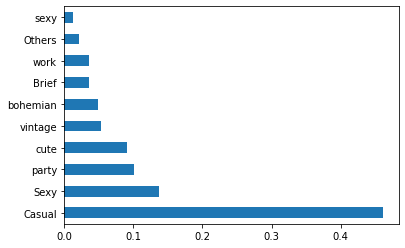

In [38]:
# Calculate the percentage of each categories in the "Style" variable.
print(inp0.Style.value_counts(normalize=True))
inp0.Style.value_counts(normalize=True).plot.barh()
plt.show()

<h3 style = "color : Green"> Ans= 9%, 2.1%</h3>

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [39]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.
neck_group=inp0['total'].groupby(inp0["NeckLine"]).sum().reset_index()
neck_group[neck_group['total']<50000]

,NeckLine,total
0,Scoop,3135.0
1,Sweetheart,14588.0
2,backless,2888.0
4,bowneck,21633.0
5,halter,2355.0
6,mandarin-collor,289.0
8,open,7396.0
9,peterpan-collor,18908.0
12,sqare-collor,32395.0
13,sweetheart,2728.0


In [40]:
inp0['NeckLine'].replace(['Scoop', 'Sweetheart', 'backless', 'bowneck','halter', 'mandarin-collor', 'open', 'peterpan-collor', 'sqare-collor', 'sweetheart'], 'Others', inplace=True)
inp0['NeckLine'].unique()

array(['o-neck', 'v-neck', 'boat-neck', 'Others', 'ruffled',
       'turndowncollor', 'slash-neck'], dtype=object)

In [41]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.
SleeveLen_group=inp0['total'].groupby(inp0["SleeveLength"]).sum().reset_index()
SleeveLen_group[SleeveLen_group['total']<50000]

,SleeveLength,total
0,Petal,30682.0
1,butterfly,29456.0
2,cap sleeves,13603.0
8,turn down collar,3583.0


In [42]:
inp0['SleeveLength'].replace(['Petal', 'butterfly', 'cap sleeves', 'turn down collar'], 'Others', inplace=True)
inp0['SleeveLength'].unique()

array(['sleeve less', 'Others', 'full sleeves', 'short', 'three quater',
       'half sleeves'], dtype=object)

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [43]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
Material_group=inp0['total'].groupby(inp0["Material"]).sum().reset_index()
Material_group[Material_group['total']<25000]

,Material,total
1,acrylic,12155.0
2,cashmere,5667.0
5,lace,6296.0
6,linen,20149.0
7,lycra,12555.0
11,modal,522.0
12,model,245.0
14,other,5458.0
17,shiffon,8295.0
19,sill,2719.0


In [44]:
inp0['Material'].replace(['acrylic', 'cashmere', 'lace', 'linen','lycra','modal','model','other','shiffon','sill','spandex','viscos','wool'], 'Others', inplace=True)
inp0['Material'].unique()

array(['Missing', 'microfiber', 'polyster', 'silk', 'chiffonfabric',
       'cotton', 'nylon', 'Others', 'milksilk', 'rayon', 'mix'],
      dtype=object)

In [45]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
FabricType_group=inp0['total'].groupby(inp0["FabricType"]).sum().reset_index()
FabricType_group[FabricType_group['total']<25000]

,FabricType,total
0,Corduroy,10866.0
2,batik,4021.0
5,dobby,2761.0
6,flannael,6835.0
7,flannel,14733.0
9,knitted,14.0
10,knitting,39.0
11,lace,2082.0
12,organza,762.0
13,other,1251.0


In [46]:
inp0['FabricType'].replace(['Corduroy', 'batik', 'dobby', 'flannael', 'flannel', 'knitted',
       'knitting', 'lace', 'organza', 'other', 'poplin', 'satin',
       'sattin', 'terry', 'tulle', 'wollen'], 'Others', inplace=True)
inp0['FabricType'].unique()

array(['chiffon', 'Missing', 'broadcloth', 'jersey', 'Others', 'worsted',
       'shiffon'], dtype=object)

In [47]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
PatternType_group=inp0['total'].groupby(inp0["Pattern Type"]).sum().reset_index()
PatternType_group[PatternType_group['total']<25000]

,Pattern Type,total
2,character,3738.0
4,floral,10614.0
6,leapord,3017.0
8,none,5991.0
10,plaid,1369.0
13,splice,5112.0


In [48]:
inp0['Pattern Type'].replace(['character', 'floral', 'leapord', 'none', 'plaid', 'splice'], 'Others', inplace=True)
inp0['Pattern Type'].unique()

array(['animal', 'print', 'dot', 'solid', 'Missing', 'patchwork',
       'striped', 'geometric', 'Others', 'leopard'], dtype=object)

In [49]:
# Group "Decoration" categories into "Others" which have less than 25000 sales across all the seasons.
Decoration_group=inp0['total'].groupby(inp0["Decoration"]).sum().reset_index()
Decoration_group[Decoration_group['total']<25000]

,Decoration,total
1,Tiered,22147.0
5,button,22203.0
6,cascading,210.0
7,crystal,6450.0
8,draped,7099.0
10,feathers,64.0
11,flowers,6676.0
14,none,3551.0
15,pearls,41.0
16,plain,2740.0


In [50]:
tempo= Decoration_group[Decoration_group['total']<25000]
tempo['Decoration'].unique()

array(['Tiered', 'button', 'cascading', 'crystal', 'draped', 'feathers',
       'flowers', 'none', 'pearls', 'plain', 'pockets', 'rivet', 'ruched',
       'tassel'], dtype=object)

In [51]:
inp0['Decoration'].replace(['Tiered', 'button', 'cascading', 'crystal', 'draped', 'feathers',
       'flowers', 'none', 'pearls', 'plain', 'pockets', 'rivet', 'ruched',
       'tassel'], 'Others', inplace=True)
inp0['Decoration'].unique()

array(['ruffles', 'Missing', 'embroidary', 'bow', 'beading', 'lace',
       'sashes', 'hollowout', 'Others', 'sequined', 'applique'],
      dtype=object)

### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size


<h3 style = "color : Green"> Ans= Style. </h3>


### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



<h3 style = "color : Green">Ans= Approx 52000. </h3>

In [52]:
# Describe the numerical variale: "Autumn".
inp0['Autumn'].max() - inp0['Autumn'].quantile(0.75)

52406.0

In [53]:
# plot the boxplot of "Autumn" column.


Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter 
- Summer  
- Spring 
- Autumn 


In [54]:
win =inp0['Winter'].max() - inp0['Winter'].quantile(0.99)
sum =inp0['Summer'].max() - inp0['Summer'].quantile(0.99)
spr = inp0['Spring'].max() - inp0['Spring'].quantile(0.99)
aut =inp0['Autumn'].max() - inp0['Autumn'].quantile(0.99)

In [55]:
# Find the maximum and 99th percentile of Winter season.
win

11402.69999999999

In [56]:
# Find the maximum and 99th percentile of Summer season.
sum

21602.999999999996

In [57]:
# Find the maximum and 99th percentile of Spring season.
spr

4716.8

In [58]:
# Find the maximum and 99th percentile of Autumn season.
aut

31397.999999999975

<h3 style = "color : Green">Ans= 31397.999999999975 </h3>

## Bivariate Analysis 

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


In [59]:
# Find the Mean of Ratings for each Price category.
print(inp0.groupby('Price')['Rating'].mean())

Price
Average      3.454430
High         2.914286
Low          3.731481
Medium       3.156667
very-high    3.123810
Name: Rating, dtype: float64


<h3 style = "color : Green">Ans = High 2.914286</h3>

What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [60]:
# Find the median of Ratings for each Style category.
print(inp0.groupby('Style')['Rating'].median())

Style
Brief       4.60
Casual      4.60
Others      0.00
Sexy        4.60
bohemian    4.60
cute        4.60
party       4.70
sexy        4.55
vintage     4.60
work        4.70
Name: Rating, dtype: float64


<h3 style = "color : Green">Ans = vintage   4.60</h3>

Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


Recommendation
0    1433.547794
1    1469.899497
Name: Summer, dtype: float64


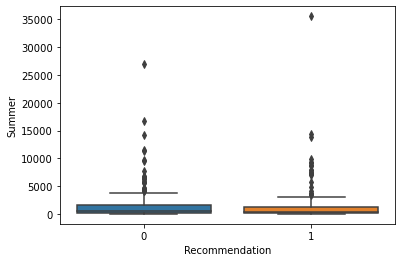

In [62]:
# Summer sale vs Recommendation.
print(inp0.groupby('Recommendation')['Summer'].mean())
sns.boxplot(data=inp0, x="Recommendation",y="Summer")
plt.show()

Recommendation
0    298.209559
1    303.658291
Name: Spring, dtype: float64


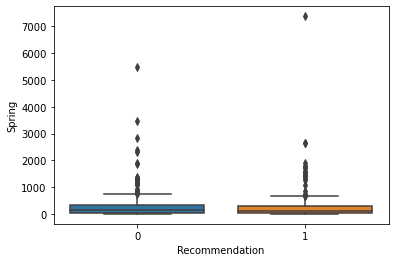

In [63]:
# Spring sale vs Recommendation.
print(inp0.groupby('Recommendation')['Spring'].mean())
sns.boxplot(data=inp0, x="Recommendation",y="Spring")
plt.show()

Recommendation
0    2841.720588
1    2868.060302
Name: Autumn, dtype: float64


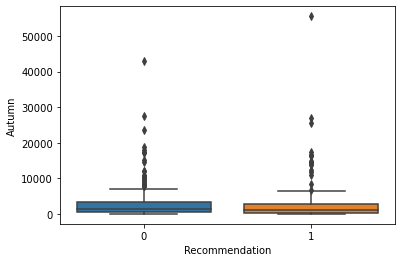

In [61]:
# Autumn sale vs Recommendation.
print(inp0.groupby('Recommendation')['Autumn'].mean())
sns.boxplot(data=inp0, x="Recommendation",y="Autumn")
plt.show()

Recommendation
0     987.654412
1    1002.809045
Name: Winter, dtype: float64


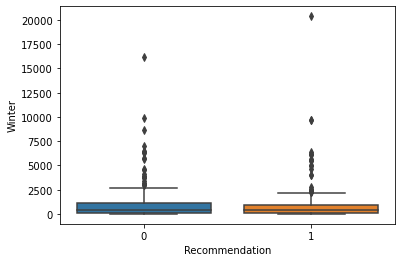

In [64]:
# Winter sale vs Recommendation.
print(inp0.groupby('Recommendation')['Winter'].mean())
sns.boxplot(data=inp0, x="Recommendation",y="Winter")
plt.show()

<h3 style = "color : Green">Ans = Autumn--- above 50000 recommendations</h3>

### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


Size
Extra Large     4
Free           74
Large          32
Medium         76
Small          13
Name: Recommendation, dtype: int64

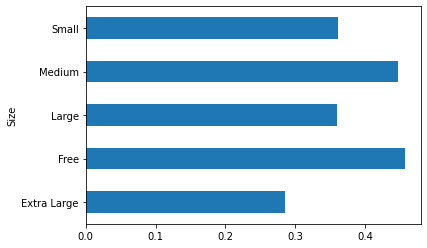

In [65]:
# Size vs Recommendation.
inp0.groupby(['Size'])['Recommendation'].mean().plot.barh()
inp0.groupby('Size')['Recommendation'].sum()

<h3 style = "color : Green">Ans = Free and medium. </h3>

### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


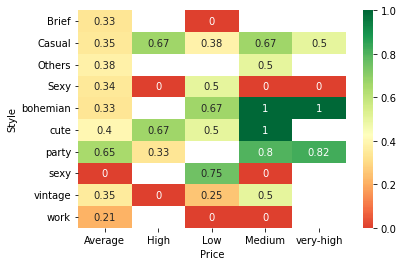

In [66]:
# plot the heat map of Style, price and Recommendation.

res = pd.pivot_table(data=inp0, index="Style", columns="Price", values="Recommendation")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)
plt.show()

<h3 style = "color : Green">Ans= Price: medium and style: cute. </h3>

Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


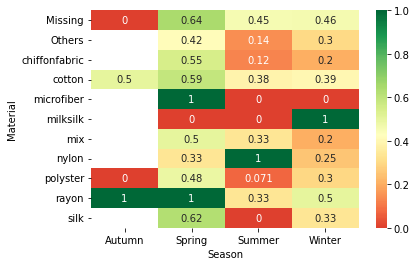

In [67]:
# plot the heat map of Season, material and Recommendation.
res = pd.pivot_table(data=inp0, index="Material", columns="Season", values="Recommendation")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)
plt.show()

<h3 style = "color : Green">Ans= Milksilk and Microfiber. </h3>